Add gain method to CrystalSlice class that applies Frantz-Nodvik equation: issue #137
https://github.com/radiasoft/rslaser/issues/137


_________________
Imports

In [1]:
import sys, time
import math
import numpy as np
from pykern import pkcli
from pykern.pkcollections import PKDict

# The rslaser library may not be installed, so a check is required.
try:
    import rslaser
except:
    # Developers should use 'pip install -e .' from the command line.
    # Users can install directly from GitHub --
    !{sys.executable} -m pip install git+https://github.com/radiasoft/rslaser.git
    import rslaser

from rslaser.pulse import pulse
from rslaser.optics import element
from rslaser.optics import drift
from rslaser.optics import crystal

import scipy.constants as const

import srwlib
from srwlib import srwl

# 2D plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# reset the notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

______________
Set laser defaults

In [2]:
# specify parameters
params = PKDict(
        photon_e_ev=1.5498, # Photon energy [eV], calculated from 800nm wavelength
        nslice = 3,
        nx_slice = 32,
        ny_slice = 32,
)

______________
Define crystal

In [3]:
# instantiate the crystal
crystal_params = PKDict(length = 2.5/100.0,  # [m]
                        nslice = 1,
                        )

______________
Look at pulse wavefronts

Text(0.5, 1.0, 'wfr 3 abs efield')

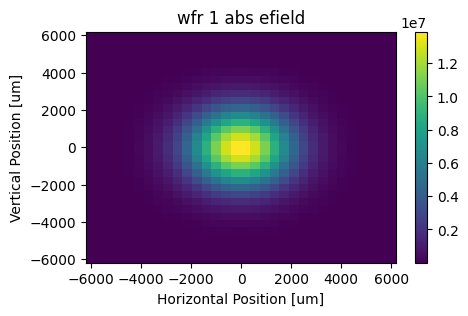

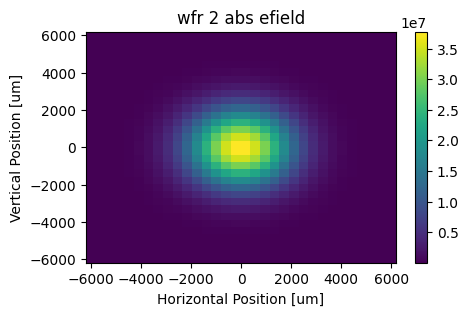

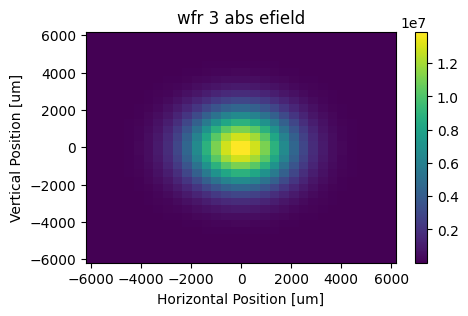

In [4]:
# Initialize laser pulse
thisPulse = pulse.LaserPulse(params)

# Plot wavefront
lp_wfr_x = np.linspace(thisPulse.slice[0].wfr.mesh.xStart,thisPulse.slice[0].wfr.mesh.xFin,thisPulse.slice[0].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[0].wfr.mesh.yStart,thisPulse.slice[0].wfr.mesh.yFin,thisPulse.slice[0].wfr.mesh.ny)

intensity0 = srwlib.array('f', [0]*thisPulse.slice[0].wfr.mesh.nx*thisPulse.slice[0].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity0, thisPulse.slice[0].wfr, 0, 0, 3, thisPulse.slice[0].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_0 = np.array(intensity0).reshape((thisPulse.slice[0].wfr.mesh.nx, thisPulse.slice[0].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_0 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_0) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_0, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 1 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[1].wfr.mesh.xStart,thisPulse.slice[1].wfr.mesh.xFin,thisPulse.slice[1].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[1].wfr.mesh.yStart,thisPulse.slice[1].wfr.mesh.yFin,thisPulse.slice[1].wfr.mesh.ny)

intensity1 = srwlib.array('f', [0]*thisPulse.slice[1].wfr.mesh.nx*thisPulse.slice[1].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity1, thisPulse.slice[1].wfr, 0, 0, 3, thisPulse.slice[1].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_1 = np.array(intensity1).reshape((thisPulse.slice[1].wfr.mesh.nx, thisPulse.slice[1].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_1 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_1) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_1, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 2 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[2].wfr.mesh.xStart,thisPulse.slice[2].wfr.mesh.xFin,thisPulse.slice[2].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[2].wfr.mesh.yStart,thisPulse.slice[2].wfr.mesh.yFin,thisPulse.slice[2].wfr.mesh.ny)

intensity3 = srwlib.array('f', [0]*thisPulse.slice[2].wfr.mesh.nx*thisPulse.slice[2].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity3, thisPulse.slice[2].wfr, 0, 0, 3, thisPulse.slice[2].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_3 = np.array(intensity3).reshape((thisPulse.slice[2].wfr.mesh.nx, thisPulse.slice[2].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_3 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_3) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_3, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 3 abs efield')


________
Interpolate excited state density mesh to match wavefront mesh

Text(0.5, 1.0, 'Temp Density Mesh 3')

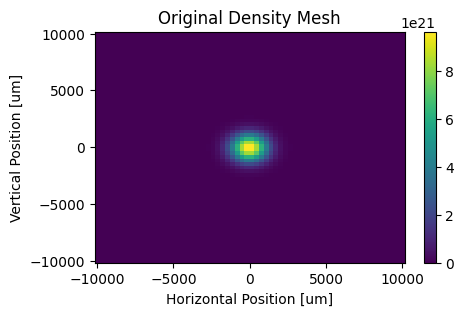

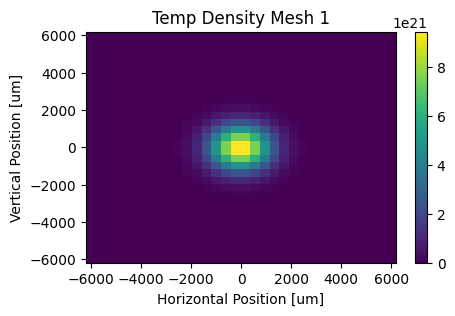

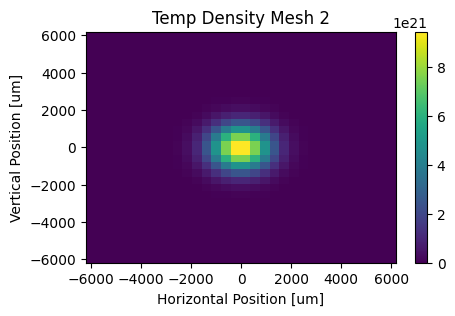

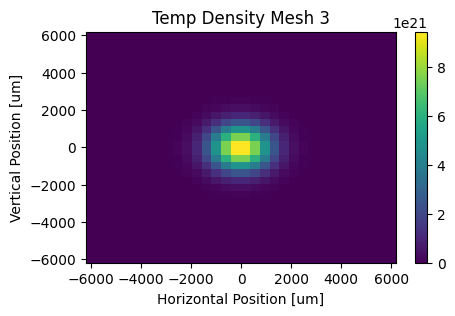

In [5]:
e_crystal = crystal.Crystal(crystal_params)

# Plot original population inversion mesh

pop_inversion_x = np.linspace(e_crystal.slice[0].pop_inversion_xstart,e_crystal.slice[0].pop_inversion_xfin,e_crystal.slice[0].pop_inversion_nx)
pop_inversion_y = np.linspace(e_crystal.slice[0].pop_inversion_ystart,e_crystal.slice[0].pop_inversion_yfin,e_crystal.slice[0].pop_inversion_ny)

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(pop_inversion_x*1e6, pop_inversion_y*1e6, e_crystal.slice[0].pop_inversion_mesh, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('Original Density Mesh')

# Plot the mesh adapted for the first laser pulse slice

temp_mesh0 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[0].wfr)
lp_wfr_x = np.linspace(thisPulse.slice[0].wfr.mesh.xStart,thisPulse.slice[0].wfr.mesh.xFin,thisPulse.slice[0].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[0].wfr.mesh.yStart,thisPulse.slice[0].wfr.mesh.yFin,thisPulse.slice[0].wfr.mesh.ny)

# plot the excited state density
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, temp_mesh0, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('Temp Density Mesh 1')

# Plot the mesh adapted for the second laser pulse slice

temp_mesh1 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[1].wfr)
lp_wfr_x = np.linspace(thisPulse.slice[1].wfr.mesh.xStart,thisPulse.slice[1].wfr.mesh.xFin,thisPulse.slice[1].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[1].wfr.mesh.yStart,thisPulse.slice[1].wfr.mesh.yFin,thisPulse.slice[1].wfr.mesh.ny)

# plot the excited state density
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, temp_mesh1, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('Temp Density Mesh 2')

# Plot the mesh adapted for the third laser pulse slice

temp_mesh2 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[2].wfr)
lp_wfr_x = np.linspace(thisPulse.slice[2].wfr.mesh.xStart,thisPulse.slice[2].wfr.mesh.xFin,thisPulse.slice[2].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[2].wfr.mesh.yStart,thisPulse.slice[2].wfr.mesh.yFin,thisPulse.slice[2].wfr.mesh.ny)

# plot the excited state density
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, temp_mesh2, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('Temp Density Mesh 3')


___________
Calcuate gain and change to pop_inversion in notebook

In [6]:
thisPulse = pulse.LaserPulse(params)

wfr0 = thisPulse.slice[0].wfr
wfr1 = thisPulse.slice[1].wfr
wfr2 = thisPulse.slice[2].wfr
dx0 = (wfr0.mesh.xFin - wfr0.mesh.xStart)/wfr0.mesh.nx
dy0 = (wfr0.mesh.yFin - wfr0.mesh.yStart)/wfr0.mesh.ny
dx1 = (wfr1.mesh.xFin - wfr1.mesh.xStart)/wfr1.mesh.nx
dy1 = (wfr1.mesh.yFin - wfr1.mesh.yStart)/wfr1.mesh.ny
dx2 = (wfr2.mesh.xFin - wfr2.mesh.xStart)/wfr2.mesh.nx
dy2 = (wfr2.mesh.yFin - wfr2.mesh.yStart)/wfr2.mesh.ny

# total number of incident photons per unit area
n_incident_photons0 = thisPulse.slice[0].n_photons_2d / (dx0 * dy0)   # [1/m^2]
n_incident_photons1 = thisPulse.slice[1].n_photons_2d / (dx1 * dy1)   # [1/m^2]
n_incident_photons2 = thisPulse.slice[2].n_photons_2d / (dx2 * dy2)   # [1/m^2]

print('Total number photons, lsp 1, initially: ', np.sum(np.sum(thisPulse.slice[0].n_photons_2d)))
print('Total number photons, lsp 2, initially: ', np.sum(np.sum(thisPulse.slice[1].n_photons_2d)))
print('Total number photons, lsp 3, initially: ', np.sum(np.sum(thisPulse.slice[2].n_photons_2d)))

e_crystal = crystal.Crystal(crystal_params)

# Calc gain here for comparison with implemented method
cslice_length = e_crystal.slice[0].length            # [m]
absorp_cross_sec = 2.0e-24                           # [m^2] (2.0e-20 cm^2)
degen_factor = 1.0                                   # Not sure what this value should be

print('Max pop_inversion, initially: ', np.max(e_crystal.slice[0].pop_inversion_mesh))
print('\n')


# Propagate 1st laser pulse slice

temp_mesh0 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[0].wfr)

energy_gain0 = (1.0 /(degen_factor *absorp_cross_sec *n_incident_photons0)) \
                *np.log(1 +np.exp(absorp_cross_sec *temp_mesh0 *cslice_length) \
                *(np.exp(degen_factor *absorp_cross_sec *n_incident_photons0) -1.0))

# Update the number of photons
new_n_photons0 = thisPulse.slice[0].n_photons_2d * energy_gain0
print('Total number photons, lps 1, post gain: ', np.sum(np.sum(new_n_photons0)))

# Update the pop_inversion
temp_mesh_change0 = -(degen_factor * n_incident_photons0 * (energy_gain0 - 1.0) / cslice_length)
temp_mesh_change0 = e_crystal.slice[0]._interpolate_pop_change(thisPulse.slice[0].wfr,temp_mesh_change0)

e_crystal.slice[0].pop_inversion_mesh += temp_mesh_change0
print('Max pop_inversion, lps 1, post gain: ', np.max(e_crystal.slice[0].pop_inversion_mesh))
print('\n')


# Propagate 2nd laser pulse slice

temp_mesh1 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[1].wfr)

energy_gain1 = (1.0 /(degen_factor *absorp_cross_sec *n_incident_photons1)) \
                *np.log(1 +np.exp(absorp_cross_sec *temp_mesh1 *cslice_length) \
                *(np.exp(degen_factor *absorp_cross_sec *n_incident_photons1) -1.0))

# Update the number of photons
new_n_photons1 = thisPulse.slice[1].n_photons_2d * energy_gain1
print('Total number photons, lps 2, post gain: ', np.sum(np.sum(new_n_photons1)))

# Update the pop_inversion
temp_mesh_change1 = -(degen_factor * n_incident_photons1 * (energy_gain1 - 1.0) / cslice_length)
temp_mesh_change1 = e_crystal.slice[0]._interpolate_pop_change(thisPulse.slice[1].wfr,temp_mesh_change1)

e_crystal.slice[0].pop_inversion_mesh += temp_mesh_change1
print('Max pop_inversion, lps 2, post gain: ', np.max(e_crystal.slice[0].pop_inversion_mesh))
print('\n')


# Propagate 3rd laser pulse slice

temp_mesh2 = e_crystal.slice[0]._interpolate_pop_inversion(thisPulse.slice[2].wfr)

energy_gain2 = (1.0 /(degen_factor *absorp_cross_sec *n_incident_photons2)) \
                *np.log(1 +np.exp(absorp_cross_sec *temp_mesh2 *cslice_length) \
                *(np.exp(degen_factor *absorp_cross_sec *n_incident_photons2) -1.0))

# Update the number of photons
new_n_photons2 = thisPulse.slice[2].n_photons_2d * energy_gain2
print('Total number photons, lps 3, post gain: ', np.sum(np.sum(new_n_photons2)))

# Update the pop_inversion
temp_mesh_change2 = -(degen_factor * n_incident_photons2 * (energy_gain2 - 1.0) / cslice_length)
temp_mesh_change2 = e_crystal.slice[0]._interpolate_pop_change(thisPulse.slice[2].wfr,temp_mesh_change2)

e_crystal.slice[0].pop_inversion_mesh += temp_mesh_change2
print('Max pop_inversion, lps 3, post gain: ', np.max(e_crystal.slice[0].pop_inversion_mesh))

Total number photons, lsp 1, initially:  1265079400000000.0
Total number photons, lsp 2, initially:  9347743000000000.0
Total number photons, lsp 3, initially:  1265079400000000.0
Max pop_inversion, initially:  9.624449160713802e+21


Total number photons, lps 1, post gain:  1265334874002003.2
Max pop_inversion, lps 1, post gain:  9.619712250461456e+21


Total number photons, lps 2, post gain:  9349335506356628.0
Max pop_inversion, lps 2, post gain:  9.58936037105927e+21


Total number photons, lps 3, post gain:  1265334213536182.8
Max pop_inversion, lps 3, post gain:  9.584638107774095e+21


_________
Try propagating laser pulse

In [7]:
e_crystal = crystal.Crystal(crystal_params)
thisPulse = pulse.LaserPulse(params)

print('Total number photons, lps 1, initially: ', np.sum(np.sum(thisPulse.slice[0].n_photons_2d)))
print('Total number photons, lps 2, initially: ', np.sum(np.sum(thisPulse.slice[1].n_photons_2d)))
print('Total number photons, lps 3, initially: ', np.sum(np.sum(thisPulse.slice[2].n_photons_2d)))
print('Max pop_inversion, initially: ', np.max(e_crystal.slice[0].pop_inversion_mesh))
print('\n')

# Through crystal (1 slice for now)
thisPulse = e_crystal.propagate(thisPulse, 'gain_test') #'n0n2_srw')

print('\n')
print('Total number photons, lps 1, propagate: ', np.sum(np.sum(thisPulse.slice[0].n_photons_2d)))
print('Total number photons, lps 2, propagate: ', np.sum(np.sum(thisPulse.slice[1].n_photons_2d)))
print('Total number photons, lps 3, propagate: ', np.sum(np.sum(thisPulse.slice[2].n_photons_2d)))
print('Max pop_inversion, propagate: ', np.max(e_crystal.slice[0].pop_inversion_mesh))
print('\n')


Total number photons, lps 1, initially:  1265079400000000.0
Total number photons, lps 2, initially:  9347743000000000.0
Total number photons, lps 3, initially:  1265079400000000.0
Max pop_inversion, initially:  9.624449160713802e+21


prop_type = gain_test (n0n2_srw)
n0: 1.75, n2: 1.75
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Propagated pulse slice  1  of  3
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Propagated pulse slice  2  of  3
Extracting intensity and saving it to a file ... comple

___________
Plot wavefront electric field after

Text(0.5, 1.0, 'wfr 3 abs efield')

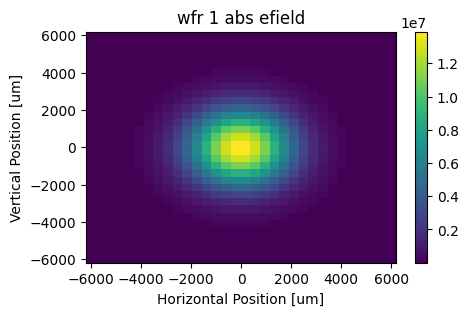

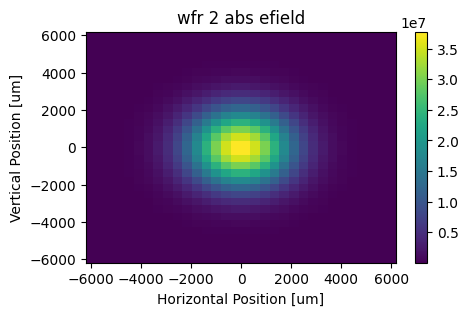

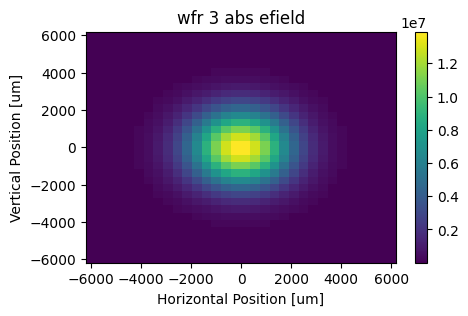

In [8]:
# Plot wavefront
lp_wfr_x = np.linspace(thisPulse.slice[0].wfr.mesh.xStart,thisPulse.slice[0].wfr.mesh.xFin,thisPulse.slice[0].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[0].wfr.mesh.yStart,thisPulse.slice[0].wfr.mesh.yFin,thisPulse.slice[0].wfr.mesh.ny)

intensity0 = srwlib.array('f', [0]*thisPulse.slice[0].wfr.mesh.nx*thisPulse.slice[0].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity0, thisPulse.slice[0].wfr, 0, 0, 3, thisPulse.slice[0].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_0 = np.array(intensity0).reshape((thisPulse.slice[0].wfr.mesh.nx, thisPulse.slice[0].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_0 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_0) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_0, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 1 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[1].wfr.mesh.xStart,thisPulse.slice[1].wfr.mesh.xFin,thisPulse.slice[1].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[1].wfr.mesh.yStart,thisPulse.slice[1].wfr.mesh.yFin,thisPulse.slice[1].wfr.mesh.ny)

intensity1 = srwlib.array('f', [1]*thisPulse.slice[1].wfr.mesh.nx*thisPulse.slice[1].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity1, thisPulse.slice[1].wfr, 0, 0, 3, thisPulse.slice[1].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_1 = np.array(intensity1).reshape((thisPulse.slice[1].wfr.mesh.nx, thisPulse.slice[1].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_1 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_1) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_1, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 2 abs efield')

lp_wfr_x = np.linspace(thisPulse.slice[2].wfr.mesh.xStart,thisPulse.slice[2].wfr.mesh.xFin,thisPulse.slice[2].wfr.mesh.nx)
lp_wfr_y = np.linspace(thisPulse.slice[2].wfr.mesh.yStart,thisPulse.slice[2].wfr.mesh.yFin,thisPulse.slice[2].wfr.mesh.ny)

intensity3 = srwlib.array('f', [2]*thisPulse.slice[2].wfr.mesh.nx*thisPulse.slice[2].wfr.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity3, thisPulse.slice[2].wfr, 0, 0, 3, thisPulse.slice[2].wfr.mesh.eStart, 0, 0) #extracts intensity
intens_2d_3 = np.array(intensity3).reshape((thisPulse.slice[2].wfr.mesh.nx, thisPulse.slice[2].wfr.mesh.ny), order='C') #reshaping
efield_abs_2d_3 = np.sqrt(np.sqrt(const.mu_0 / const.epsilon_0) * 2.0 * intens_2d_3) # [V/m]

fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.pcolormesh(lp_wfr_x*1e6, lp_wfr_y*1e6, efield_abs_2d_3, cmap=plt.cm.viridis,shading='auto')#,vmin=0.95,vmax=1.05)
plt.colorbar()
ax.set_ylabel(r'Vertical Position [um]')
ax.set_xlabel(r'Horizontal Position [um]')
ax.set_title('wfr 3 abs efield')

_________
Compare the number of photons from the wavefront with the number from the gain

In [10]:
print('Total number photons, lps 1, propagate: ', np.sum(np.sum(thisPulse.slice[0].n_photons_2d)))
print('Total number photons, lps 2, propagate: ', np.sum(np.sum(thisPulse.slice[1].n_photons_2d)))
print('Total number photons, lps 3, propagate: ', np.sum(np.sum(thisPulse.slice[2].n_photons_2d)))
print('\n')

#Note: calc_init_n_photons should only really be called when initializing a laser pulse slice... 
# I call it here just to check that the update to the electric fields of the wavefront match
# the update to the number of photons itself.
print('Total number photons, lps 1, from wfr: ', np.sum(np.sum(thisPulse.slice[0].calc_init_n_photons())))
print('Total number photons, lps 2, from wfr: ', np.sum(np.sum(thisPulse.slice[1].calc_init_n_photons())))
print('Total number photons, lps 3, from wfr: ', np.sum(np.sum(thisPulse.slice[2].calc_init_n_photons())))

Total number photons, lps 1, propagate:  1265334700000000.0
Total number photons, lps 2, propagate:  9349335000000000.0
Total number photons, lps 3, propagate:  1265334100000000.0


Total number photons, lps 1, from wfr:  1265334700000000.0
Total number photons, lps 2, from wfr:  9349334000000000.0
Total number photons, lps 3, from wfr:  1265334100000000.0


These are very close, just that rounding issue